In [1]:
import PIL
from PIL import Image
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
import matplotlib.pyplot as plt
import seg_config
import cv2
import numpy as np
import os


In [62]:
modelPath = seg_config.MODEL_PATH  # Path to trained model
imagePath = "/home/mumbot/tombs/fasterRCNN/sem_segment/Train/fol.40(vr)1L.png"  # Test image
height=width=224
ip = os.path.join(seg_config.Train_GTIMG, '2ndfol.19(vr)1L.png')
print(ip)
model = '/home/mumbot/tombs/fasterRCNN/sem_segment/out/mod_50E.torch'


Train/img_orgin/2ndfol.19(vr)1L.png


In [63]:
transformImg = tf.Compose([tf.ToPILImage(),
                           tf.Resize((224,224)),
                           tf.ToTensor(),
                          tf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [67]:
# load model and model_path
Net = torchvision.models.segmentation.deeplabv3_resnet50(pretrained = True)
Net.classifier[4] = torch.nn.Conv2d(256, 4, kernel_size=(1,1), stride=(1,1))
Net = Net.to(seg_config.DEVICE)
Net.load_state_dict(torch.load(seg_config.MODEL_PATH))
Net.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

tensor([[[ 6.6028,  6.6028,  6.6028,  ...,  6.1992,  6.1992,  6.1992],
         [ 6.6028,  6.6028,  6.6028,  ...,  6.1992,  6.1992,  6.1992],
         [ 6.6028,  6.6028,  6.6028,  ...,  6.1992,  6.1992,  6.1992],
         ...,
         [ 6.1480,  6.1480,  6.1480,  ...,  5.6002,  5.6002,  5.6002],
         [ 6.1480,  6.1480,  6.1480,  ...,  5.6002,  5.6002,  5.6002],
         [ 6.1480,  6.1480,  6.1480,  ...,  5.6002,  5.6002,  5.6002]],

        [[-1.6613, -1.6613, -1.6613,  ..., -1.2841, -1.2841, -1.2841],
         [-1.6613, -1.6613, -1.6613,  ..., -1.2841, -1.2841, -1.2841],
         [-1.6613, -1.6613, -1.6613,  ..., -1.2841, -1.2841, -1.2841],
         ...,
         [-1.8025, -1.8025, -1.8025,  ..., -1.6809, -1.6809, -1.6809],
         [-1.8025, -1.8025, -1.8025,  ..., -1.6809, -1.6809, -1.6809],
         [-1.8025, -1.8025, -1.8025,  ..., -1.6809, -1.6809, -1.6809]],

        [[-1.4948, -1.4948, -1.4948,  ..., -1.1042, -1.1042, -1.1042],
         [-1.4948, -1.4948, -1.4948,  ..., -1

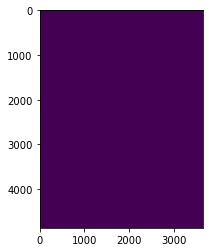

In [68]:
# open and show 
img = Image.open(imagePath).convert('RGB')
h,w = img.height, img.width
img = np.array(img)
plt.imshow(img)
img = transformImg(img)
img = torch.autograd.Variable(img, requires_grad = False).to(seg_config.DEVICE).unsqueeze(0)
with torch.no_grad():
    prd = Net(img)['aux']
prd = tf.Resize((h,w))(prd[0])
print(prd)
print(prd.shape)
seg = torch.argmax(prd, 0).cpu().detach().numpy()
print(seg)
print(np.max(seg), np.min(seg))
plt.imshow(seg)
plt.show()

seg = seg.transpose(1,2,0)
print(np.min(seg),np.max(seg))
plt.imshow(seg)
plt.show

torch.Size([3, 224, 224])


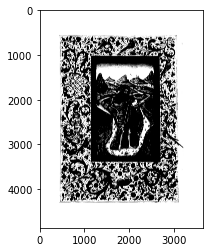

In [7]:
im = Image.open(ip).convert('RGB')
im = np.array(im)
plt.imshow(im)
im = transformImg(im)
print(im.shape)